# task 1: problem understanding

## 1) specify business problem

## 2) business requirement
## 3) literature survey 
## 4) social/business impact


# task 2: data understanding
## 1) data collection
## 2) loading data


# task 3: EDA 
## 1) data cleaning 
## 2) data manipulation
## 3) visualization


# task 4: model building 

# task 5: testing the model
# task 6: deployment
# task 7: document


In [133]:
# Importing required lib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [134]:
import warnings 
warnings.filterwarnings('ignore')

In [135]:
# checking for available styles

In [136]:

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [137]:

# Applying styles to notebook

In [138]:
plt.style.use('fivethirtyeight')


In [139]:
# Reading csv data
df = pd.read_csv('/content/kidney_disease.csv') 
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


<Axes: xlabel='al', ylabel='Density'>

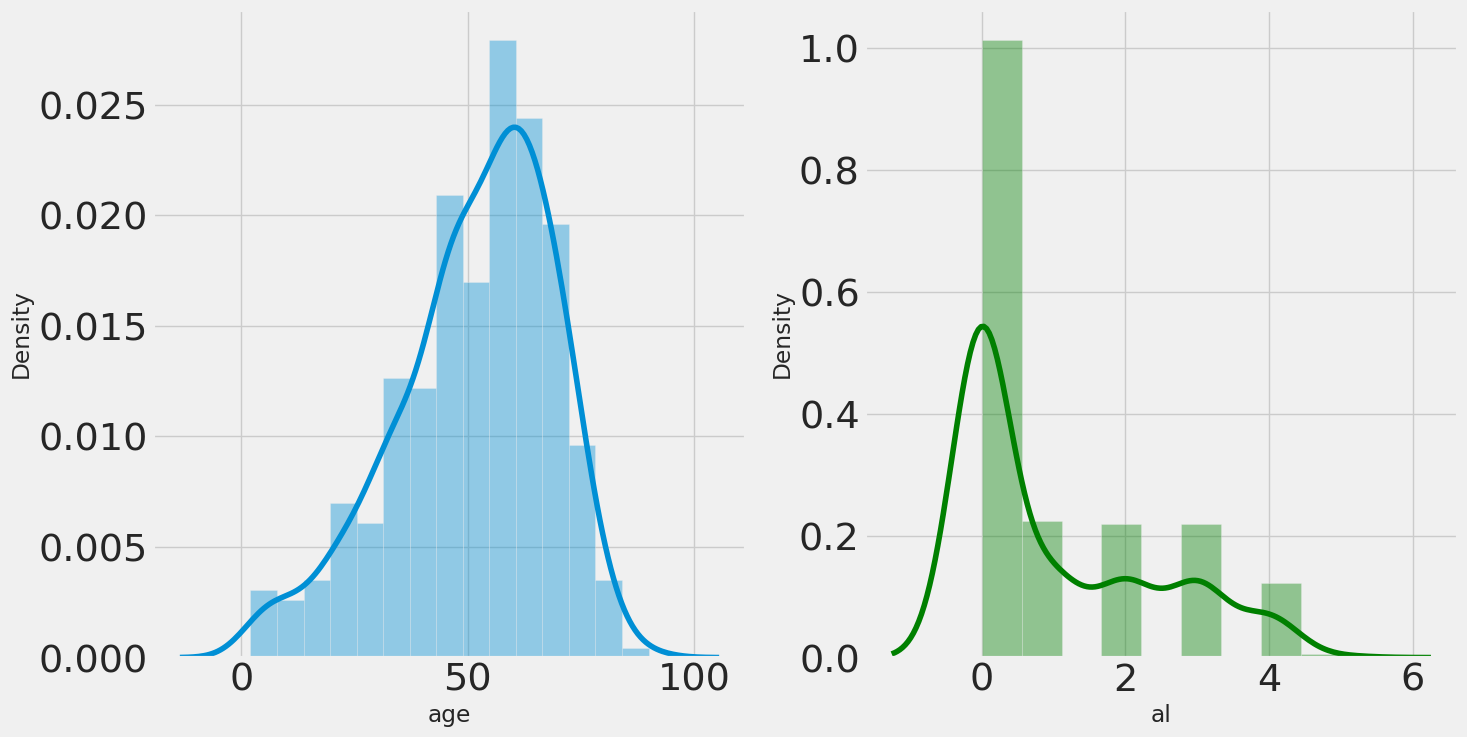

In [140]:
# univariate analysis - extracting info from a single column

# checking data distribution

plt.figure(figsize=(15,8))
plt.subplot(121)
sns.distplot(df['age'])
plt.subplot(122)
sns.distplot(df['al'],color='green')


In [141]:

# creating dumy dataframe for categorical values 

df_cat =df.select_dtypes(include='float')
df_cat.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


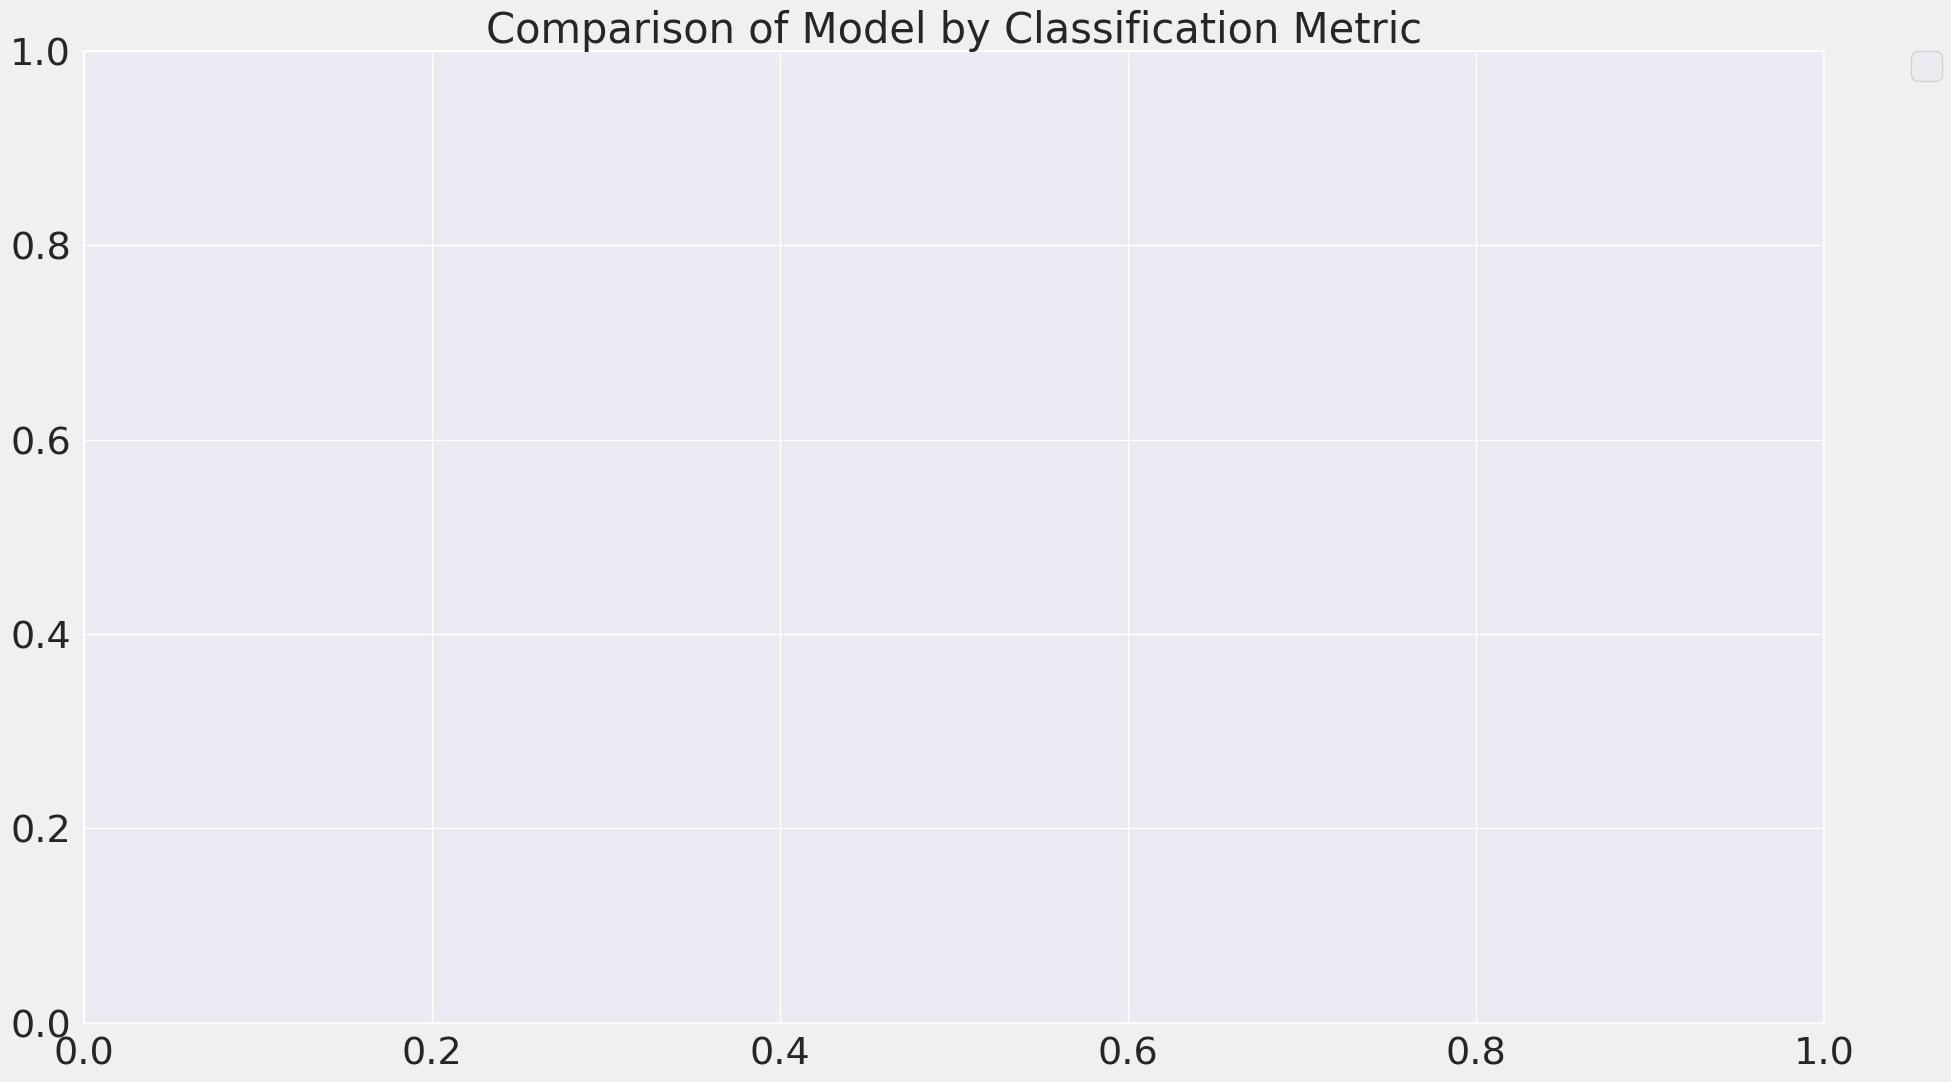

In [142]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [143]:

for i,j in enumerate(df_cat):
  print(j)

age
bp
sg
al
su
bgr
bu
sc
sod
pot
hemo


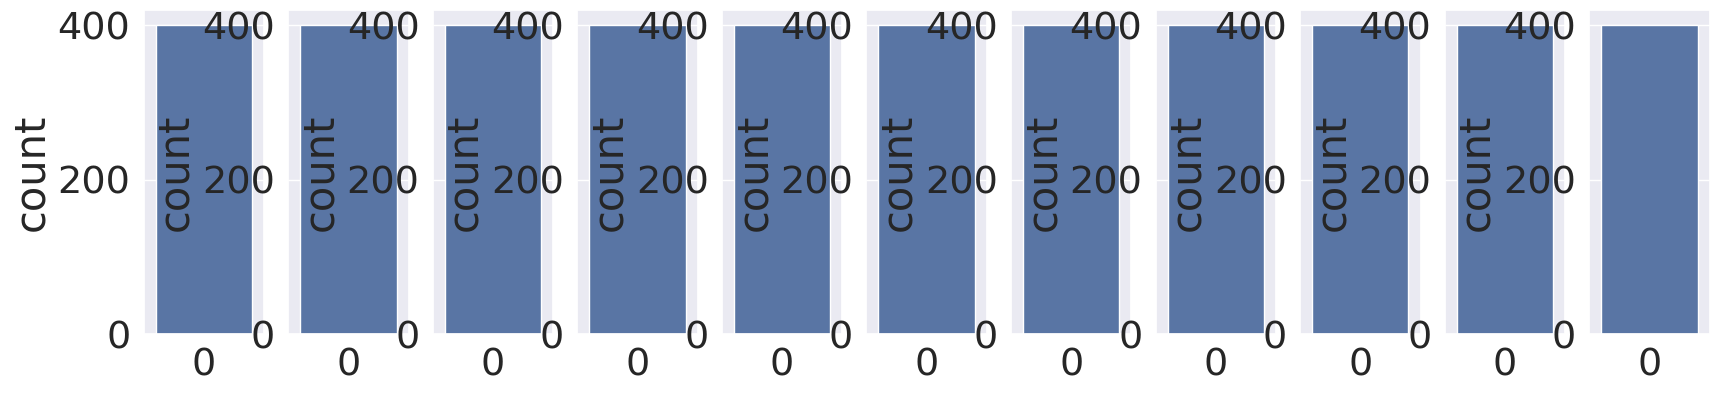

In [144]:
# visualizing counts in each variable

plt.figure(figsize=(18,4))
for i,j in enumerate(df_cat):
  plt.subplot(1,11,i+1)
  sns.countplot(df[j])

<Axes: xlabel='age', ylabel='count'>

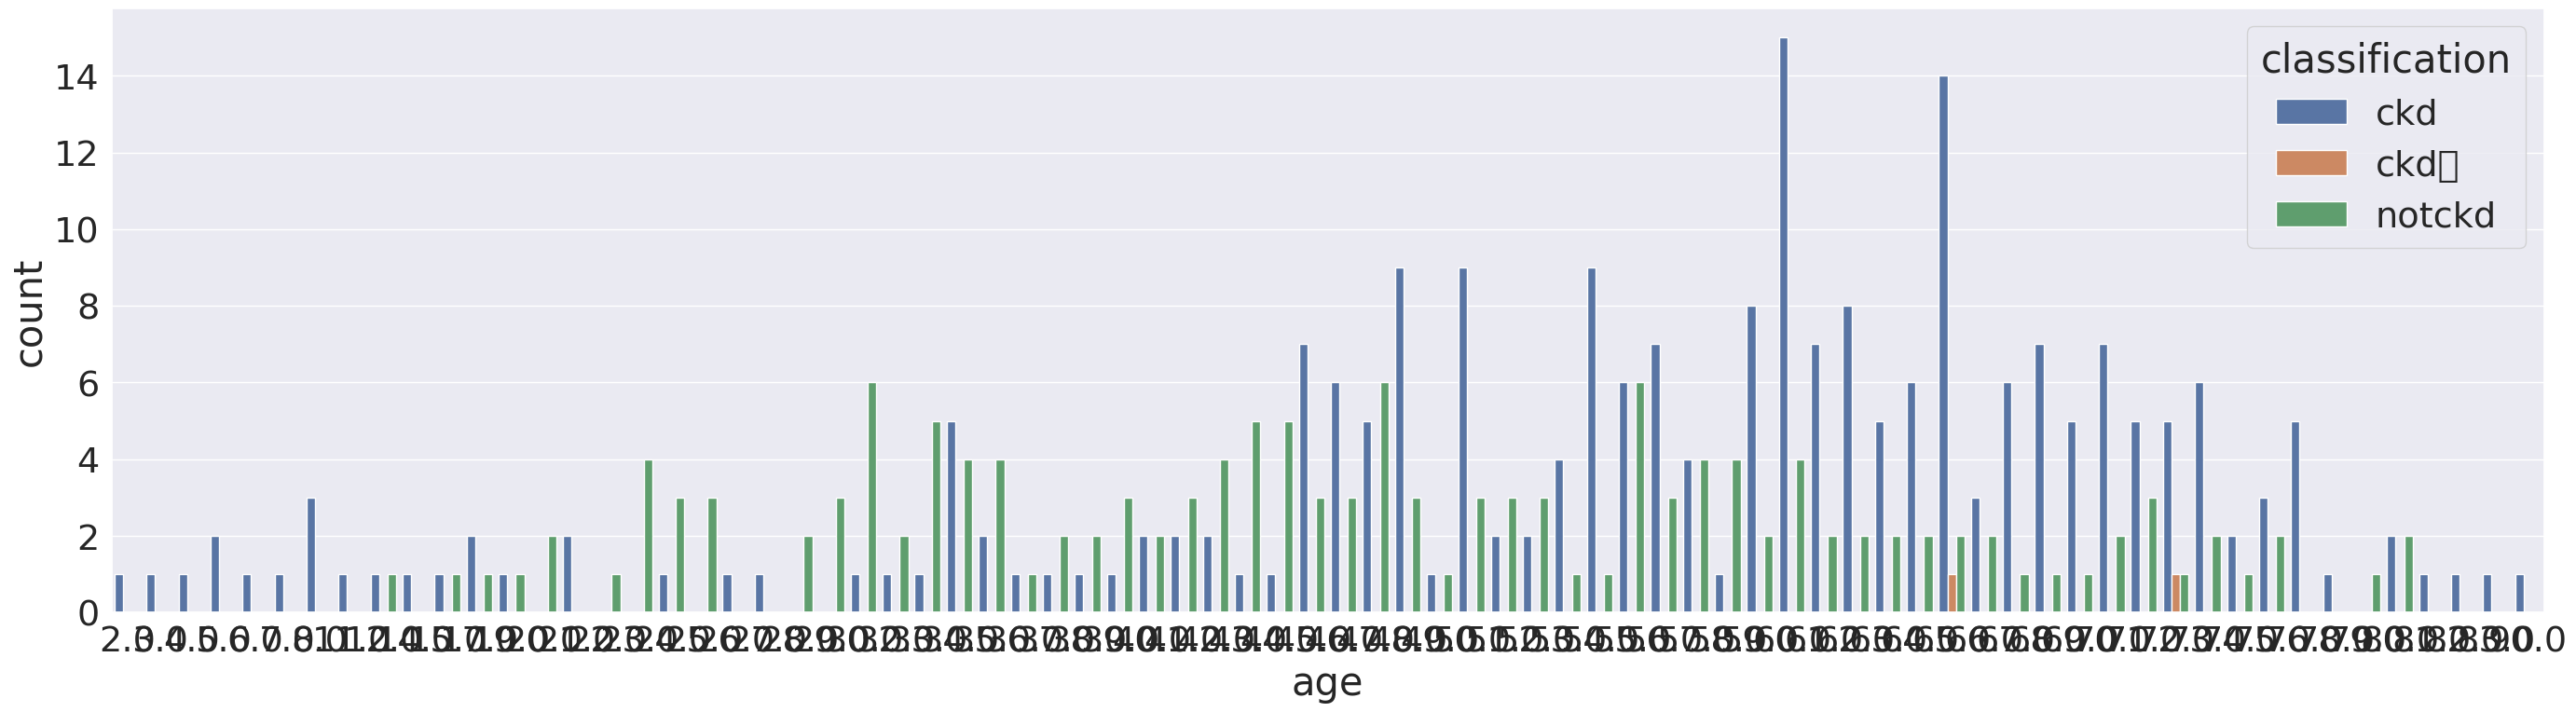

In [145]:
# Bivariate analysis - extracting info from double column

# visualizing the relation between cad, al, pcc & bp


plt.figure(figsize=(30,8))
plt.subplot(111)
sns.countplot(data=df,x='age',hue='classification')




<Axes: xlabel='age', ylabel='count'>

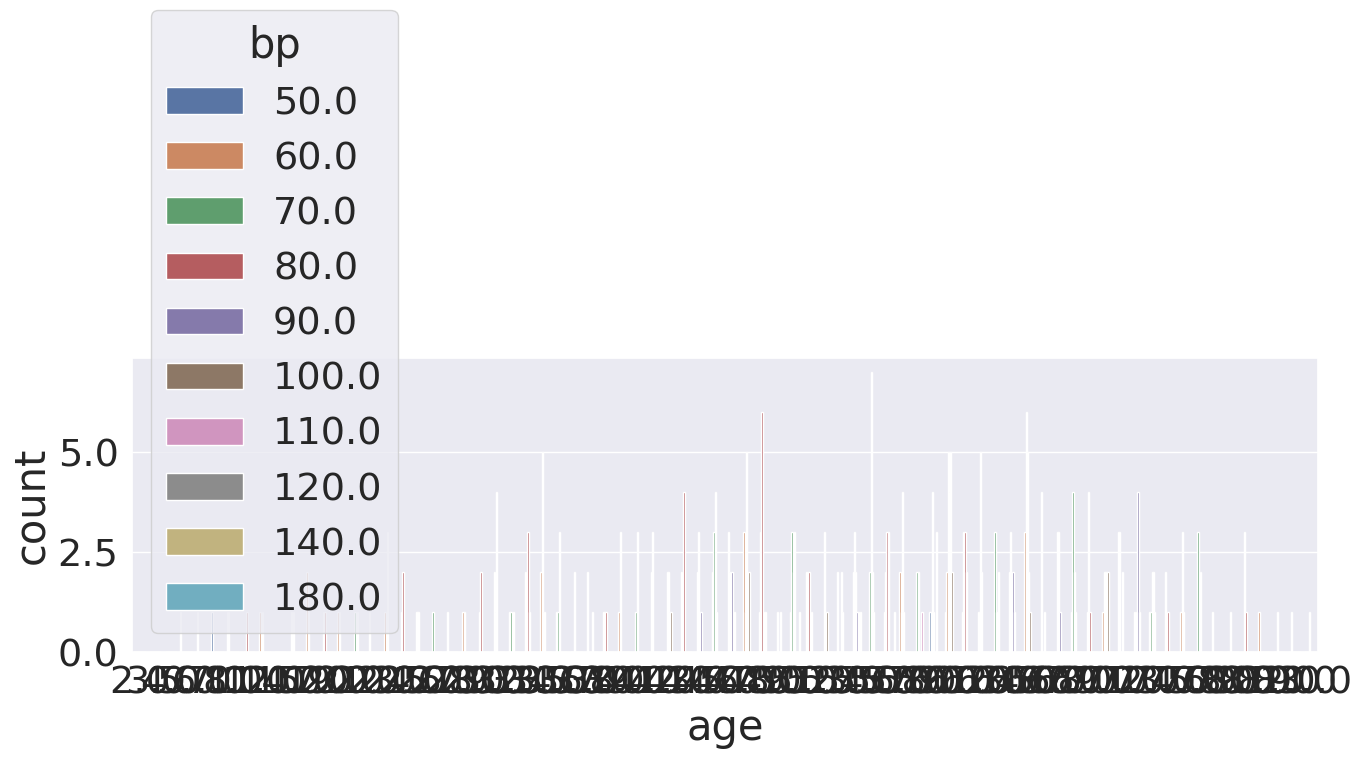

In [146]:
plt.figure(figsize=(30,8))
plt.subplot(222)
sns.countplot(data=df,x='age',hue='bp')

In [147]:

# finding relation between age_ & bp

pd.crosstab(df['age'],df['bp'])


bp,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,140.0,180.0
age,,,,,,,,,,
5.0,1,0,0,0,0,0,0,0,0,0
6.0,0,1,0,0,0,0,0,0,0,0
7.0,1,0,0,0,0,0,0,0,0,0
8.0,1,1,0,0,0,0,0,0,0,0
11.0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80.0,0,0,3,1,0,0,0,0,0,0
81.0,0,1,0,0,0,0,0,0,0,0
82.0,0,0,0,1,0,0,0,0,0,0


<Axes: xlabel='al', ylabel='su'>

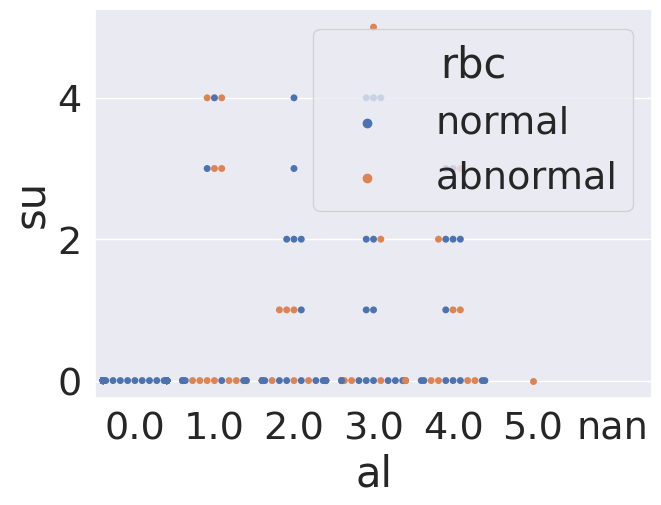

In [148]:
# multivariate analysis - extract info from more than 2 columns

sns.swarmplot(data=df,x='al',y='su',hue='rbc')



<Axes: xlabel='pc', ylabel='hemo'>

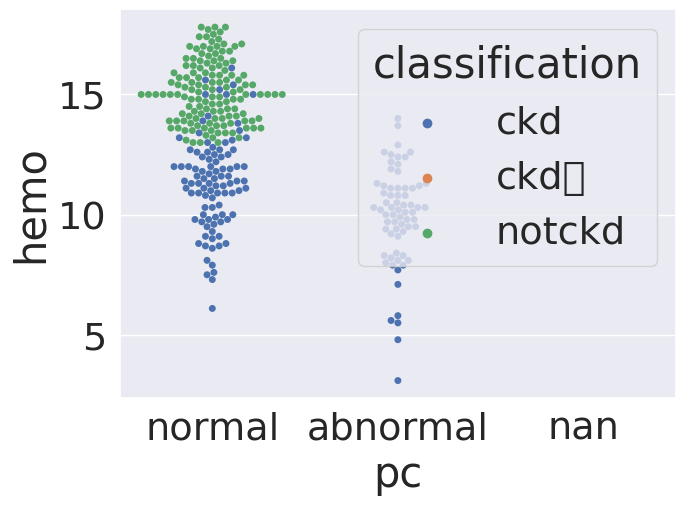

In [149]:
sns.swarmplot(data=df,x='pc',y='hemo',hue='classification')

<Axes: >

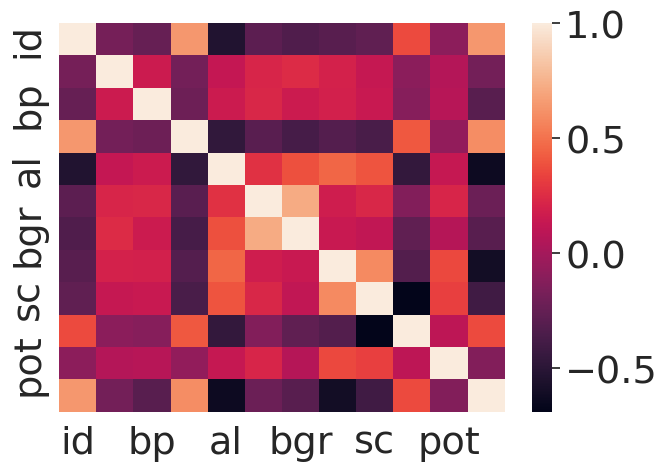

In [150]:
#finding corr

sns.heatmap(df.corr())

In [151]:
# descriptive analysis _ descriptive stot
df.describe(include='all')


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# data preprocessing

# finding the shape of data
df.shape

(400, 26)

In [153]:
# finding null values
df.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [154]:
df.isnull().sum().sum()

1009

In [155]:
print(df['age'].mean())

51.48337595907928


In [156]:
print(df['age'].mean())
df['age'] = df['age'].fillna(51.483)
print(df.isnull().sum())


51.48337595907928
id                  0
age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [157]:
print(df['bp'].mean())
print(df['al'].mean())
print(df['su'].mean())
print(df['bgr'].mean())
print(df['bu'].mean())
print(df['sc'].mean())
print(df['sod'].mean())
print(df['pot'].mean())
print(df['hemo'].mean())



76.46907216494846
1.0169491525423728
0.45014245014245013
148.0365168539326
57.425721784776904
3.072454308093995
137.52875399361022
4.62724358974359
12.526436781609195


In [158]:
print(df['bp'].mean())
df['bp'] = df['bp'].fillna(76.469)
print(df.isnull().sum())

76.46907216494846
id                  0
age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [159]:
print(df['sg'].mean())
df['sg'] = df['sg'].fillna(1.01)
print(df.isnull().sum())

1.0174079320113314
id                  0
age                 0
bp                  0
sg                  0
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [160]:
print(df['al'].mean())
df['al'] = df['al'].fillna(0.450)
print(df.isnull().sum())

1.0169491525423728
id                  0
age                 0
bp                  0
sg                  0
al                  0
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [161]:
print(df['su'].mean())
df['su'] = df['su'].fillna(148.0)
print(df.isnull().sum())

0.45014245014245013
id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [162]:
print(df['bu'].mean())
df['bu'] = df['bu'].fillna(57.4)
print(df.isnull().sum())

57.425721784776904
id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                  0
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [163]:
print(df['sc'].mean())
df['sc'] = df['sc'].fillna(3.07)
print(df.isnull().sum())

3.072454308093995
id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                  0
sc                  0
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [164]:
print(df['sod'].mean())
df['sod'] = df['sod'].fillna(137.5)
print(df.isnull().sum())

137.52875399361022
id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                  0
sc                  0
sod                 0
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [165]:
print(df['pot'].mean())
df['pot'] = df['pot'].fillna(4.62)
print(df.isnull().sum())

4.62724358974359
id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                  0
sc                  0
sod                 0
pot                 0
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [166]:
print(df['hemo'].mean())
df['hemo'] = df['hemo'].fillna(12.5)
print(df.isnull().sum())

12.526436781609195
id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [167]:
# coverting object datatype to int

from sklearn.preprocessing import LabelEncoder

In [168]:
le = LabelEncoder

In [169]:
# Encoding
#Encoding with replace method
df['rbc'] = df['rbc'].replace({'normal' :1,'abnormal' :0})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [170]:
# Encoding
#Encoding with replace method
df['pc'] = df['pc'].replace({'normal' :1,'abnormal' :0})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [171]:
# Encoding
#Encoding with replace method
df['pcc'] = df['pcc'].replace({'present' :1,'notpresent' :0})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [172]:
# Encoding
#Encoding with replace method
df['ba'] = df['ba'].replace({'present' :1,'notpresent' :0})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [173]:
# Encoding
#Encoding with replace method
df['pcv'] = df['pcv'].replace({'NaN' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [174]:
# Encoding
#Encoding with replace method
df['wc'] = df['wc'].replace({'NaN' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [175]:
# Encoding
#Encoding with replace method
df['htn'] = df['htn'].replace({'no' :0,'yes' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,no,no,good,no,no,ckd


In [176]:
# Encoding
#Encoding with replace method
df['dm'] = df['dm'].replace({'no' :0,'yes' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,no,good,no,no,ckd


In [177]:
# Encoding
#Encoding with replace method
df['cad'] = df['cad'].replace({'no' :0,'yes' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,good,no,no,ckd


In [178]:
# Encoding
#Encoding with replace method
df['appet'] = df['appet'].replace({'poor' :0,'good' :1})

df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,no,no,ckd


In [179]:
# Encoding
#Encoding with replace method
df['pe'] = df['pe'].replace({'no' :0,'yes' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,no,ckd


In [180]:
# Encoding
#Encoding with replace method
df['ane'] = df['ane'].replace({'no' :0,'yes' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [181]:
# Encoding
#Encoding with replace method
df['ane'] = df['ane'].replace({'ckd' :1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [182]:
# finding dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

<Axes: >

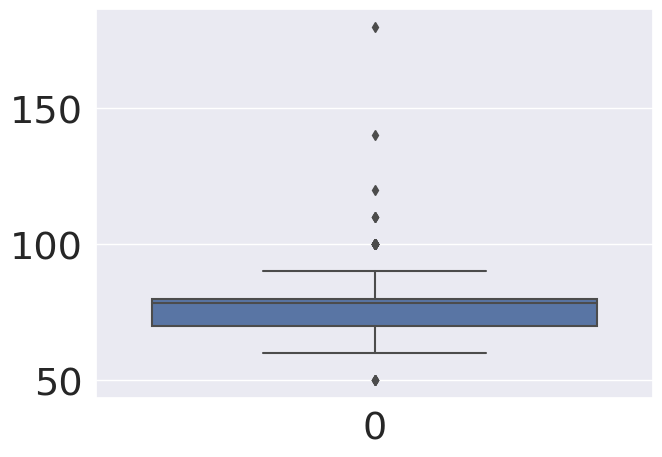

In [183]:

# finding outliers
sns.boxplot(df['bp'])

In [184]:
# finding the count of outliers
# IQR = q3-q1...,ub=q3+(1.5*IQR),lb=q1-(1.5*IQR)
q1 = np.quantile(df['bp'],0.25)
q3 = np.quantile(df['bp'],0.75)

print('Q1={}'.format(q1))
print('Q3={}'.format(q3))

IQR =q3-q1

print('IQR value is {}'.format(IQR))

upperbound = q3+(1.5*IQR)
lowerbound = q1-(1.5*IQR)

print('the upper bound value is {} & the lower bound value is {}'.format(upperbound,lowerbound))

print('skwed data :',len(df[df['bp']>upperbound]))

Q1=70.0
Q3=80.0
IQR value is 10.0
the upper bound value is 95.0 & the lower bound value is 55.0
skwed data : 31


<Axes: xlabel='bp', ylabel='Density'>

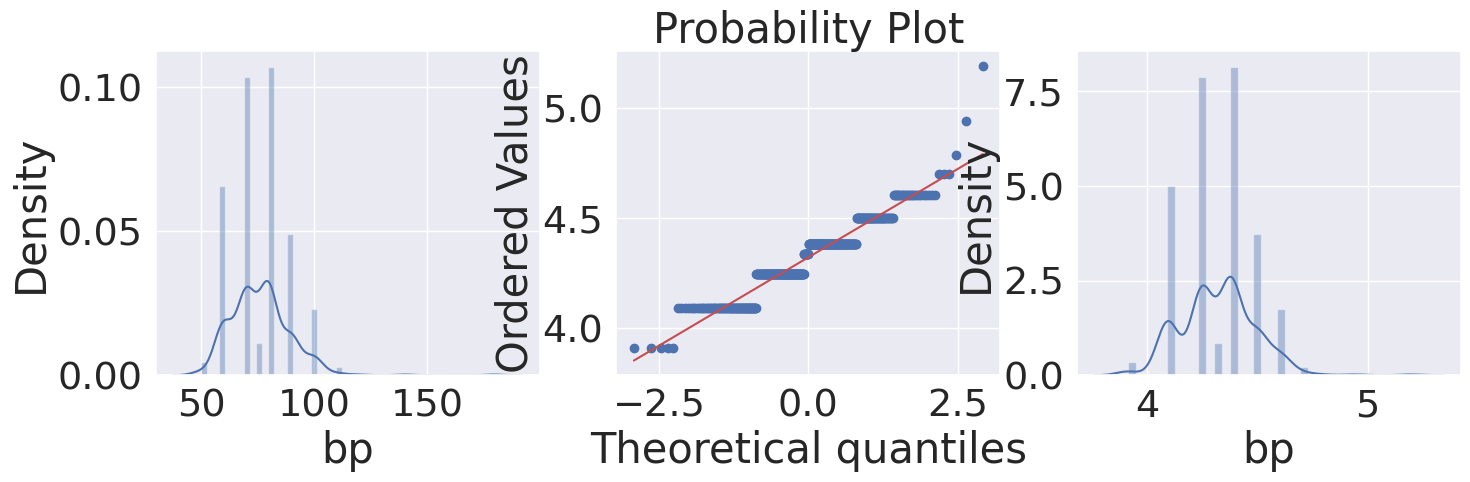

In [185]:

# handling outliers

from scipy import stats

plt.figure(figsize=(15,4))
plt.subplot(131)
sns.distplot(df['bp'])
plt.subplot(132)
stats.probplot(np.log(df['bp']),plot=plt)
plt.subplot(133)
sns.distplot(np.log(df['bp']))

In [186]:
# transforming normal value to log values

df['al']=np.log(df['al'])
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,0.000000,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,50.0,1.020,1.386294,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,80.0,1.010,0.693147,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,70.0,1.005,1.386294,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,80.0,1.010,0.693147,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [187]:
stats.probplot(np.log(df['bp']))

((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

In [188]:
df['bp']=np.log(df['bp'])


In [189]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,4.382027,1.020,0.000000,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,3.912023,1.020,1.386294,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,4.382027,1.010,0.693147,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,4.248495,1.005,1.386294,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,4.382027,1.010,0.693147,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [190]:
# Encoding

# Encoding with list comp

df['bp']=[0 if x=='LOW' else 1 if x=='NORMAL' else 2 for x in df['bp']]

In [191]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,2,1.020,0.000000,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,2,1.020,1.386294,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,2,1.010,0.693147,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,2,1.005,1.386294,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,2,1.010,0.693147,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [192]:
# encoding with replace method

df ['pc'] = df ['pc'].replace({'normal':0,'high':1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,2,1.020,0.000000,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,2,1.020,1.386294,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,2,1.010,0.693147,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,2,1.005,1.386294,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,2,1.010,0.693147,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [193]:
# encoding with replace method

df ['rbc'] = df ['rbc'].replace({'normal':0,'high':1})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,2,1.020,0.000000,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,2,1.020,1.386294,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,2,1.010,0.693147,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,2,1.005,1.386294,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,2,1.010,0.693147,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [195]:

# encoding with replace method

df ['pcc'] = df ['pcc'].replace({'normal':1,'high':0})
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,2,1.020,0.000000,0.0,NaN,1.0,0.0,0.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,1,7.0,2,1.020,1.386294,0.0,NaN,1.0,0.0,0.0,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,2,62.0,2,1.010,0.693147,3.0,1.0,1.0,0.0,0.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,3,48.0,2,1.005,1.386294,0.0,1.0,0.0,1.0,0.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,4,51.0,2,1.010,0.693147,0.0,1.0,1.0,0.0,0.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd


In [196]:
# spliting dep & indep variables

x=df.drop('classification',axis=1)
x.head()
y=df['classification']
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [197]:
# spliting dep & indep variables

x=df.drop('classification',axis=1)
x.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,2,1.020,0.000000,0.0,NaN,1.0,0.0,0.0,...,15.4,44,7800,5.2,1.0,1,0,1.0,0.0,0.0
1,1,7.0,2,1.020,1.386294,0.0,NaN,1.0,0.0,0.0,...,11.3,38,6000,NaN,0.0,0,0,1.0,0.0,0.0
2,2,62.0,2,1.010,0.693147,3.0,1.0,1.0,0.0,0.0,...,9.6,31,7500,NaN,0.0,1,0,0.0,0.0,1.0
3,3,48.0,2,1.005,1.386294,0.0,1.0,0.0,1.0,0.0,...,11.2,32,6700,3.9,1.0,0,0,0.0,1.0,1.0
4,4,51.0,2,1.010,0.693147,0.0,1.0,1.0,0.0,0.0,...,11.6,35,7300,4.6,0.0,0,0,1.0,0.0,0.0


In [198]:
# visualizing data points
import matplotlib.pyplot as plt


Simple Linear Regression

In [200]:
# importing required lib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [201]:

df=pd.read_csv("/content/kidney_disease.csv")   #loading the csv data

df.head() #return you the first 5 rows values


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [202]:
df.columns 

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [203]:
catcols=set(df.dtypes[df.dtypes=='0'].index.values) 
print(catcols)

set()


In [204]:
# Descript stat

df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [205]:
# checking null values

df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Axes: xlabel='age', ylabel='Density'>

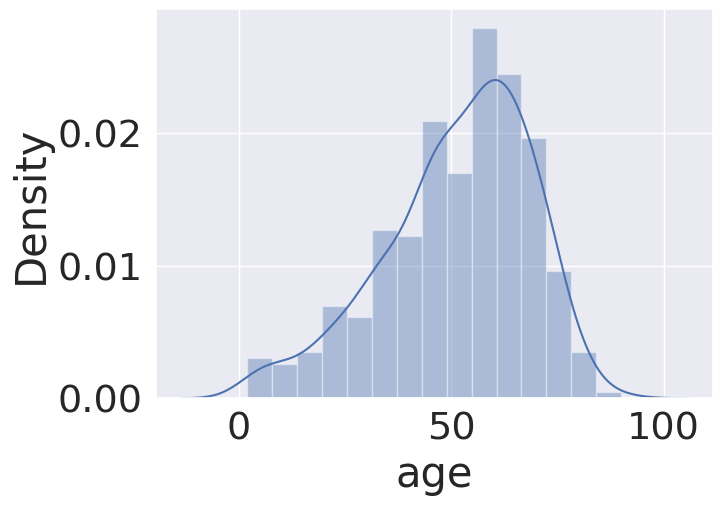

In [206]:
sns.distplot(df.age) 

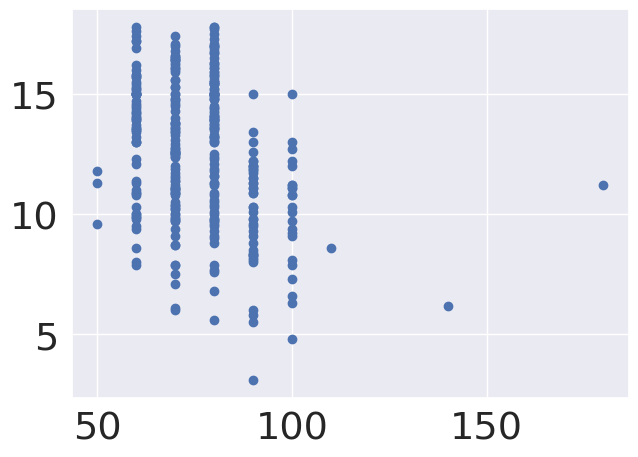

In [207]:

# visualizing data points
import matplotlib.pyplot as plt
plt.scatter(df['bp'],df['hemo'])

In [208]:
# independent variable

x=df.iloc[:,0:1]
x.head()

,id
0,0
1,1
2,2
3,3
4,4


In [209]:
# dependent variable

y=df.iloc[:,5:]
y.head()

,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [210]:
# split training & testing 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.1,random_state=11)

print(xtrain.shape)
print(xtest.shape)

(360, 1)
(40, 1)


In [211]:
xtrain

,id
197,197
341,341
182,182
130,130
214,214
...,...
269,269
337,337
91,91
80,80


In [212]:
ytrain

,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
197,NaN,NaN,NaN,notpresent,notpresent,NaN,111.0,9.3,124.0,5.3,...,NaN,4300,3.0,yes,yes,no,good,no,yes,ckd
341,0.0,normal,normal,notpresent,notpresent,130.0,37.0,0.9,150.0,5.0,...,41,7300,4.7,no,no,no,good,no,no,notckd
182,0.0,NaN,normal,notpresent,notpresent,131.0,23.0,0.8,140.0,4.1,...,35,NaN,NaN,no,no,no,good,no,no,ckd
130,0.0,normal,abnormal,present,present,128.0,208.0,9.2,134.0,4.8,...,22,16300,2.7,no,no,no,poor,yes,yes,ckd
214,0.0,NaN,abnormal,notpresent,notpresent,171.0,30.0,1.0,NaN,NaN,...,\t43,4900,5.2,no,yes,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.0,normal,normal,notpresent,notpresent,121.0,19.0,1.2,142.0,4.9,...,48,6900,5.3,no,no,no,good,no,no,notckd
337,0.0,normal,normal,notpresent,notpresent,92.0,40.0,0.9,141.0,4.9,...,52,7500,6.2,no,no,no,good,no,no,notckd
91,1.0,abnormal,normal,notpresent,notpresent,210.0,26.0,1.7,136.0,3.8,...,52,12500,5.6,no,no,no,good,no,no,ckd
80,0.0,NaN,normal,notpresent,notpresent,132.0,98.0,2.8,133.0,5.0,...,31,9400,3.8,yes,yes,no,good,no,no,ckd


In [215]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellit',
   
         'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [216]:
contcols=set(df.dtypes[df.dtypes!='0'].index.values)

print(contcols)

{'dm', 'classification', 'ane', 'bgr', 'ba', 'cad', 'appet', 'pc', 'sg', 'age', 'pcv', 'wc', 'su', 'rbc', 'bp', 'rc', 'bu', 'al', 'id', 'htn', 'pe', 'pot', 'sod', 'sc', 'hemo', 'pcc'}


In [217]:
for i in contcols:
  print("Continous Columns :",i)
  print((df[i]))
  print('*'*120+'/n')

contcols.remove('su')
contcols.remove('al')
contcols.remove('sg')
print(contcols)

Continous Columns : dm
0      yes
1       no
2      yes
3       no
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: dm, Length: 400, dtype: object
************************************************************************************************************************/n
Continous Columns : classification
0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object
************************************************************************************************************************/n
Continous Columns : ane
0       no
1       no
2      yes
3      yes
4       no
      ... 
395     no
396     no
397     no
398     no
399     no
Name: ane, Length: 400, dtype: object
************************************************************************************************************************/n
Continous Columns : bgr
0    

In [218]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellit', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [219]:
contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellit', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [220]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Text(0.5, 1.0, 'age vs bp scatter plot')

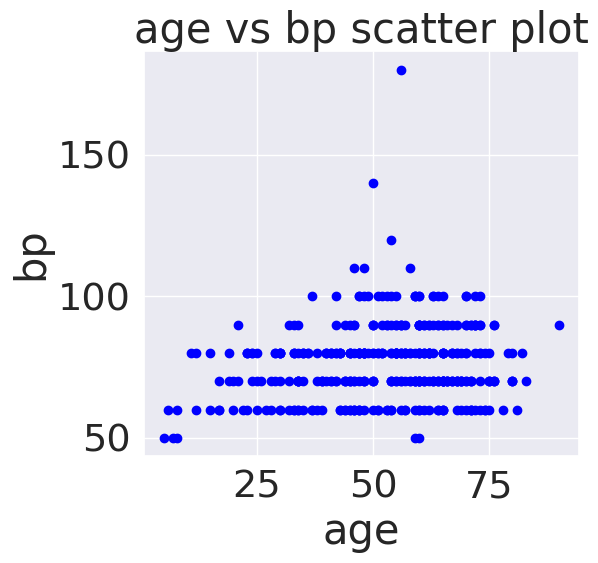

In [221]:
import matplotlib.pyplot as plt # import the matplotlib libaray
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(df['age'],df['bp'],color='blue')
plt.xlabel('age') #set the label for x-axis
plt.ylabel('bp') #set the label for y-axis
plt.title("age vs bp scatter plot") #set a title for the axes

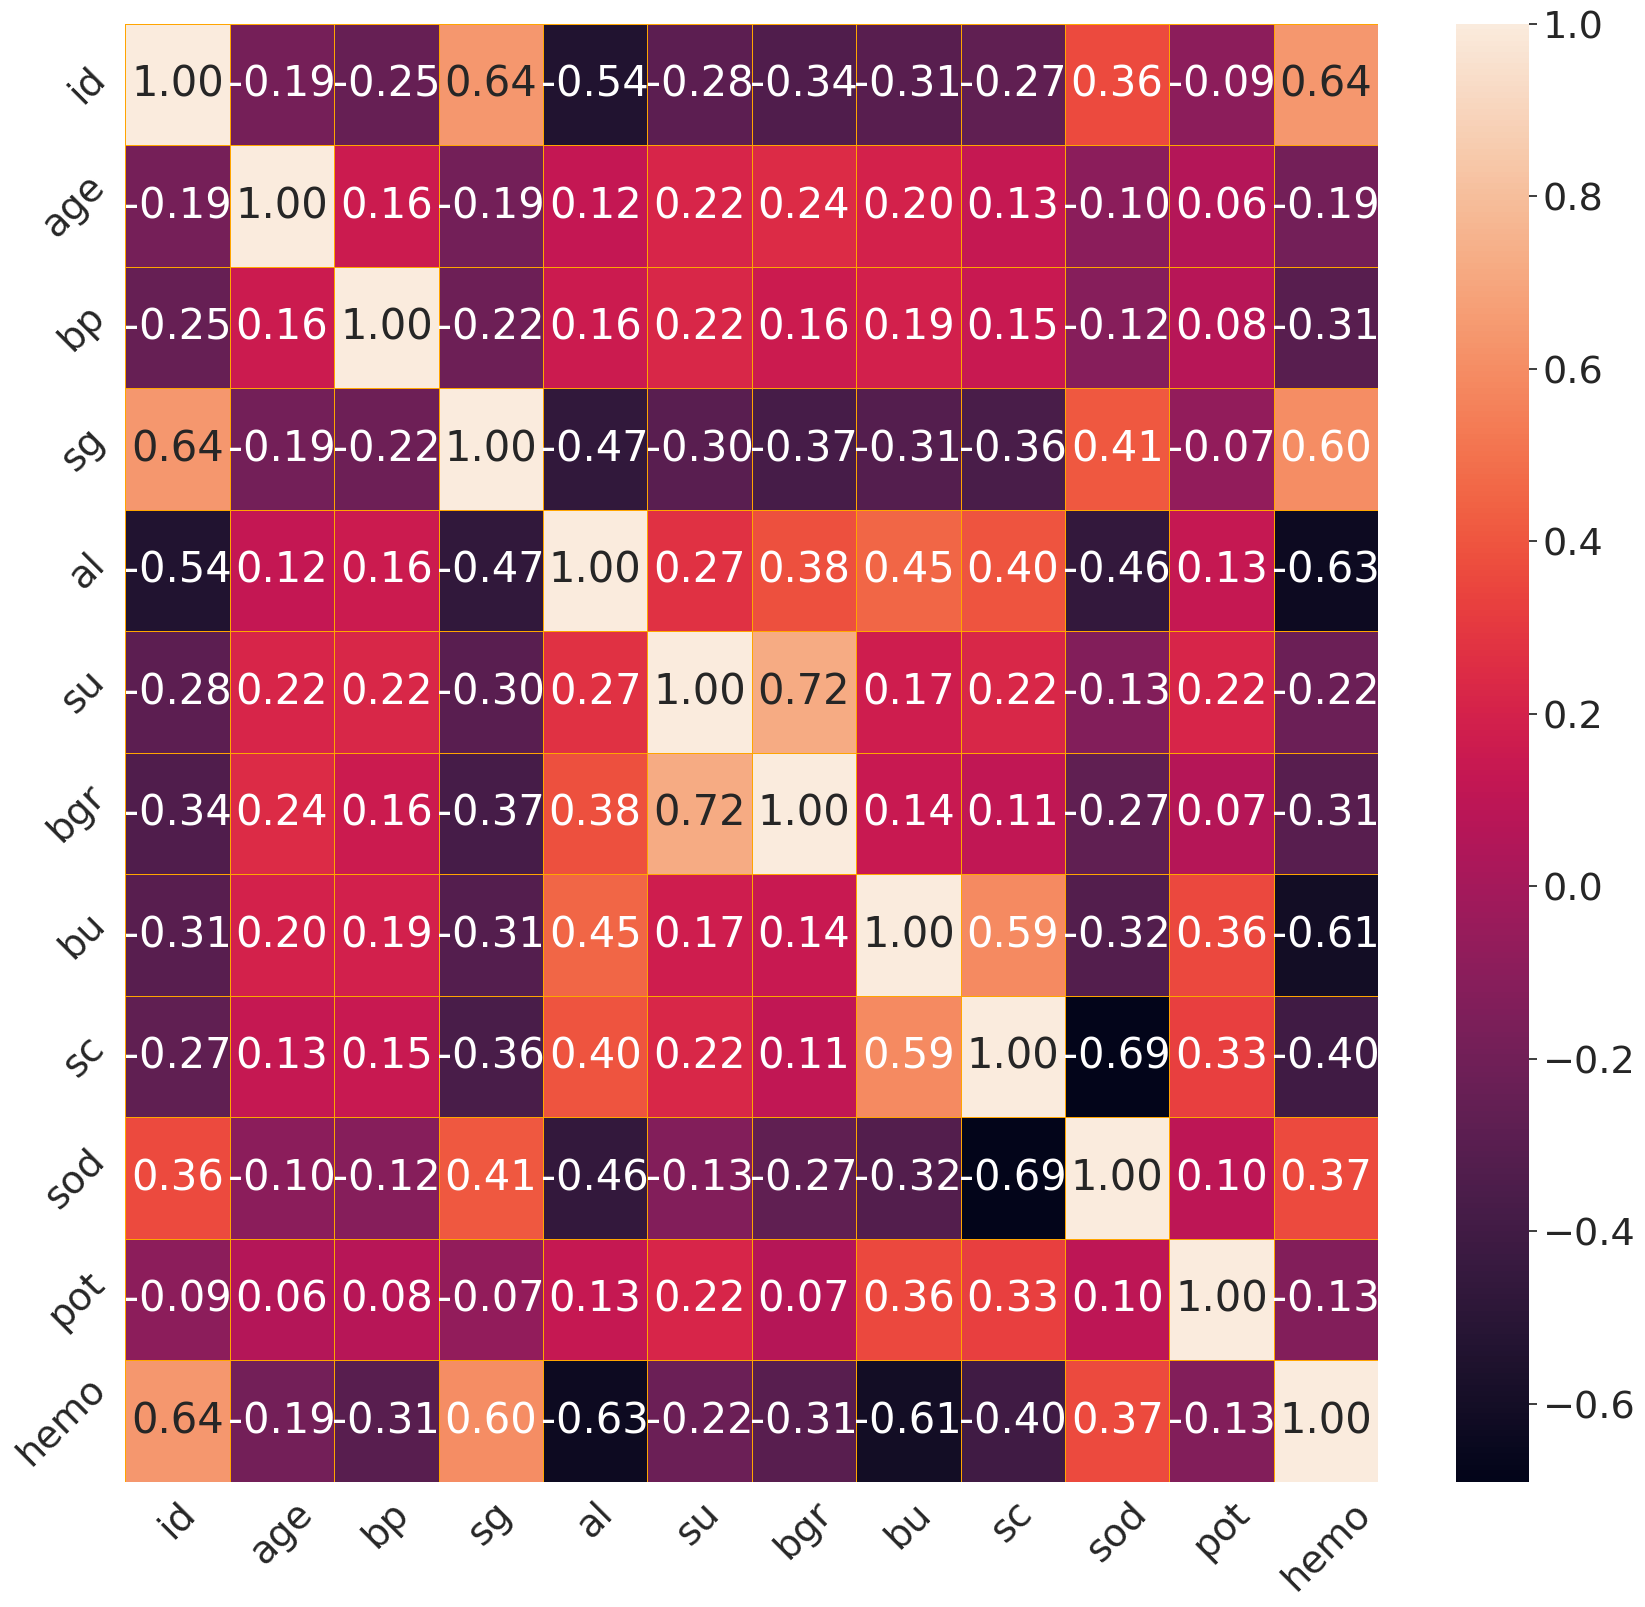

In [224]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Multi Linear Regression

In [230]:
# multi linear reg

# import necessary lib
import numpy as np
import pandas as pd
# reading the data
df = pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", df=results_long_nofit, palette="set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)


MLR-Poly

## 1) Problem Understand
## 2) Data Understanding
## 3) EDA
## 4) Model Building
## 5) Testing model
## 6) Deployment
## 7) Docs

In [ ]:
# importing req lib

import numpy as np # Numerical pyton
import pandas as pd # for data manupulation
import matplotlib.pyplot as plt # for visualization
from sklearn.preprocessing import PolynomialFeatures # polynomial regression
from sklearn.linear_model import LinearRegression # checking accuracy


In [ ]:
# reading csv data

df = pd.read_csv('/content/kidney disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# finding dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Logisitic Regression

In [ ]:
# import req lib

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
 

In [ ]:
df = pd.read_csv('/content/kidney disease.csv')
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
# Descriptive stat 

df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.shape

(400, 26)

In [ ]:
# finding dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.drop(columns=['wc', 'pcv', 'rc', 'dm', 'cad', 'classification'])

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,137.5,4.62,15.4,1.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,137.5,4.62,11.3,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,137.5,4.62,9.6,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,0.0,1.0,0.0,117.0,56.0,3.8,111.0,2.50,11.2,1.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,137.5,4.62,11.6,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,150.0,4.90,15.7,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,31.0,1.2,141.0,3.50,16.5,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,26.0,0.6,137.0,4.40,15.8,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,50.0,1.0,135.0,4.90,14.2,0.0,1.0,0.0,0.0


In [ ]:
df['pcc'].unique()

array([ 0.,  1., nan])

In [ ]:
# feature mapping 
df['pcc'].replace({"present":1,"female":0},inplace=True)

In [ ]:
# spliting independent & dependent variable
x = df.drop('su',axis=1)
y = df['su']
y

0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: su, Length: 400, dtype: float64

In [ ]:
# spliting training data & testing data

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)


In [ ]:
print("shape of independent training data is {}. shape of independent testing data is {}".format(xtrain.shape, xtest.shape))
print("shape of dependent training data is {}. shape of dependent testing data is {}".format(ytrain.shape, ytest.shape))


shape of independent training data is (320, 25). shape of independent testing data is (80, 25)
shape of dependent training data is (320,). shape of dependent testing data is (80,)


In [ ]:
# initializing logistic reg 
log_r = LogisticRegression()

In [ ]:
ytest


332    0.0
111    3.0
352    0.0
205    NaN
56     4.0
      ... 
304    0.0
187    0.0
166    NaN
64     0.0
27     4.0
Name: su, Length: 80, dtype: float64

In [ ]:
# Evaluating model 
from sklearn.metrics import classification_report, confusion_matrix


classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from scipy import stats

In [ ]:
# read and run the data

df = pd.read_csv('/content/kidney disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


<Axes: >

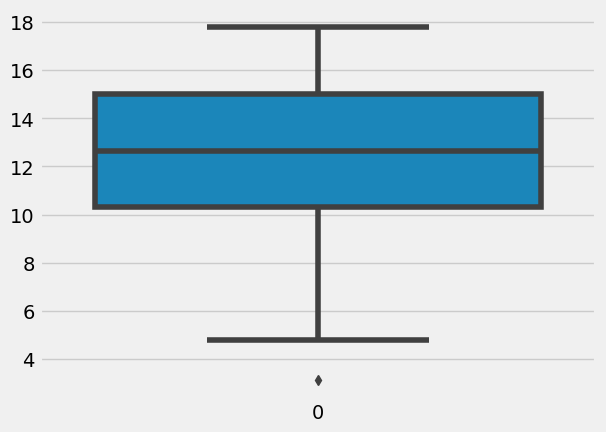

In [ ]:

sns.boxplot(df['hemo'])

In [ ]:
# finding the count of outliers
q1 = np.quantile(df['id'],0.25)
q3 = np.quantile(df['id'],0.75)

IQR =q3-q1

upperbound = q3+(1.5*IQR)
lowerbound = q1-(1.5*IQR)

skewed_values = len(df[df['id']>upperbound])

print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))
print('IQR = {}'.format(IQR))
print('upper bound = {}'.format(upperbound))
print('lower bound = {}'.format(lowerbound))
print('count of skewed data = {}'.format(skewed_values))

Q1 = 99.75
Q3 = 299.25
IQR = 199.5
upper bound = 598.5
lower bound = -199.5
count of skewed data = 0


In [ ]:
# Handling outliers
def transform(variable):
  plt.figure(figsize=(14,6))
  plt.distplot(variable)
  stats.probplot(variable,plot=plt)
  

Navie bayes

In [229]:
from sklearn import naive_bayes
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv('/content/kidney_disease.csv') 
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [123]:
df['rbc'] = df['rbc'].replace({'normal' :1,'abnormal' :0})
df['pc'] = df['pc'].replace({'normal' :1,'abnormal' :0})
df['pcc'] = df['pcc'].replace({'present' :1,'notpresent' :0})
df['ba'] = df['ba'].replace({'present' :1,'notpresent' :0})
df['pcv'] = df['pcv'].replace({'NaN' :1})
df['wc'] = df['wc'].replace({'NaN' :1})
df['htn'] = df['htn'].replace({'no' :0,'yes' :1})
df['dm'] = df['dm'].replace({'no' :0,'yes' :1})
df['cad'] = df['cad'].replace({'no' :0,'yes' :1})
df['appet'] = df['appet'].replace({'poor' :0,'good' :1})
df['pe'] = df['pe'].replace({'no' :0,'yes' :1})
df['ane'] = df['ane'].replace({'no' :0,'yes' :1})
df['ane'] = df['ane'].replace({'ckd' :1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [113]:
#spliting denpendent &independent 

x = df.iloc[:,1:]
y = df.iloc[:,0]

In [114]:
y

0        0
1        1
2        2
3        3
4        4
      ... 
395    395
396    396
397    397
398    398
399    399
Name: id, Length: 400, dtype: int64

In [115]:
col_name = x.columns

In [116]:
#manual encoding

x = np.where(x=='y',1,x)
x = np.where(x=='n',0,x)
x = np.where(x=='?',1,x)

In [117]:
x = pd.DataFrame(x,columns=col_name)
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


ANN Regression

In [107]:
# importing the keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [109]:
# creating ANN skleton view

classifications  = Sequential()
classifications.add(Dense(30,activation='relu'))
classifications.add(Dense(128,activation='relu'))
classifications.add(Dense(64,activation='relu'))
classifications.add(Dense(32,activation='relu'))
classifications.add(Dense(1,activation='sigmoid'))

In [110]:
# Compiling the ANN model

classifications.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [111]:
classifications.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

In [ ]:
classifications.predict([[3535.56,575757.63,5465.657,5]])

1/1 [==============================] - 0s 66ms/step


array([[0.]], dtype=float32)

In [ ]:
classifications.predict([[457436.56,68578.63,986456.657,1]])

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)